In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

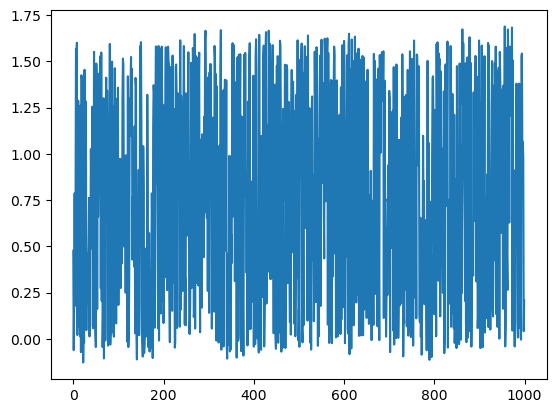

In [36]:
file_name='background0.csv'
data_csv=pd.read_csv('./data/phase/'+file_name)
data=data_csv.values.T
plt.plot(data_csv.CH2V)

Text(0.5, 0, 'frequency')

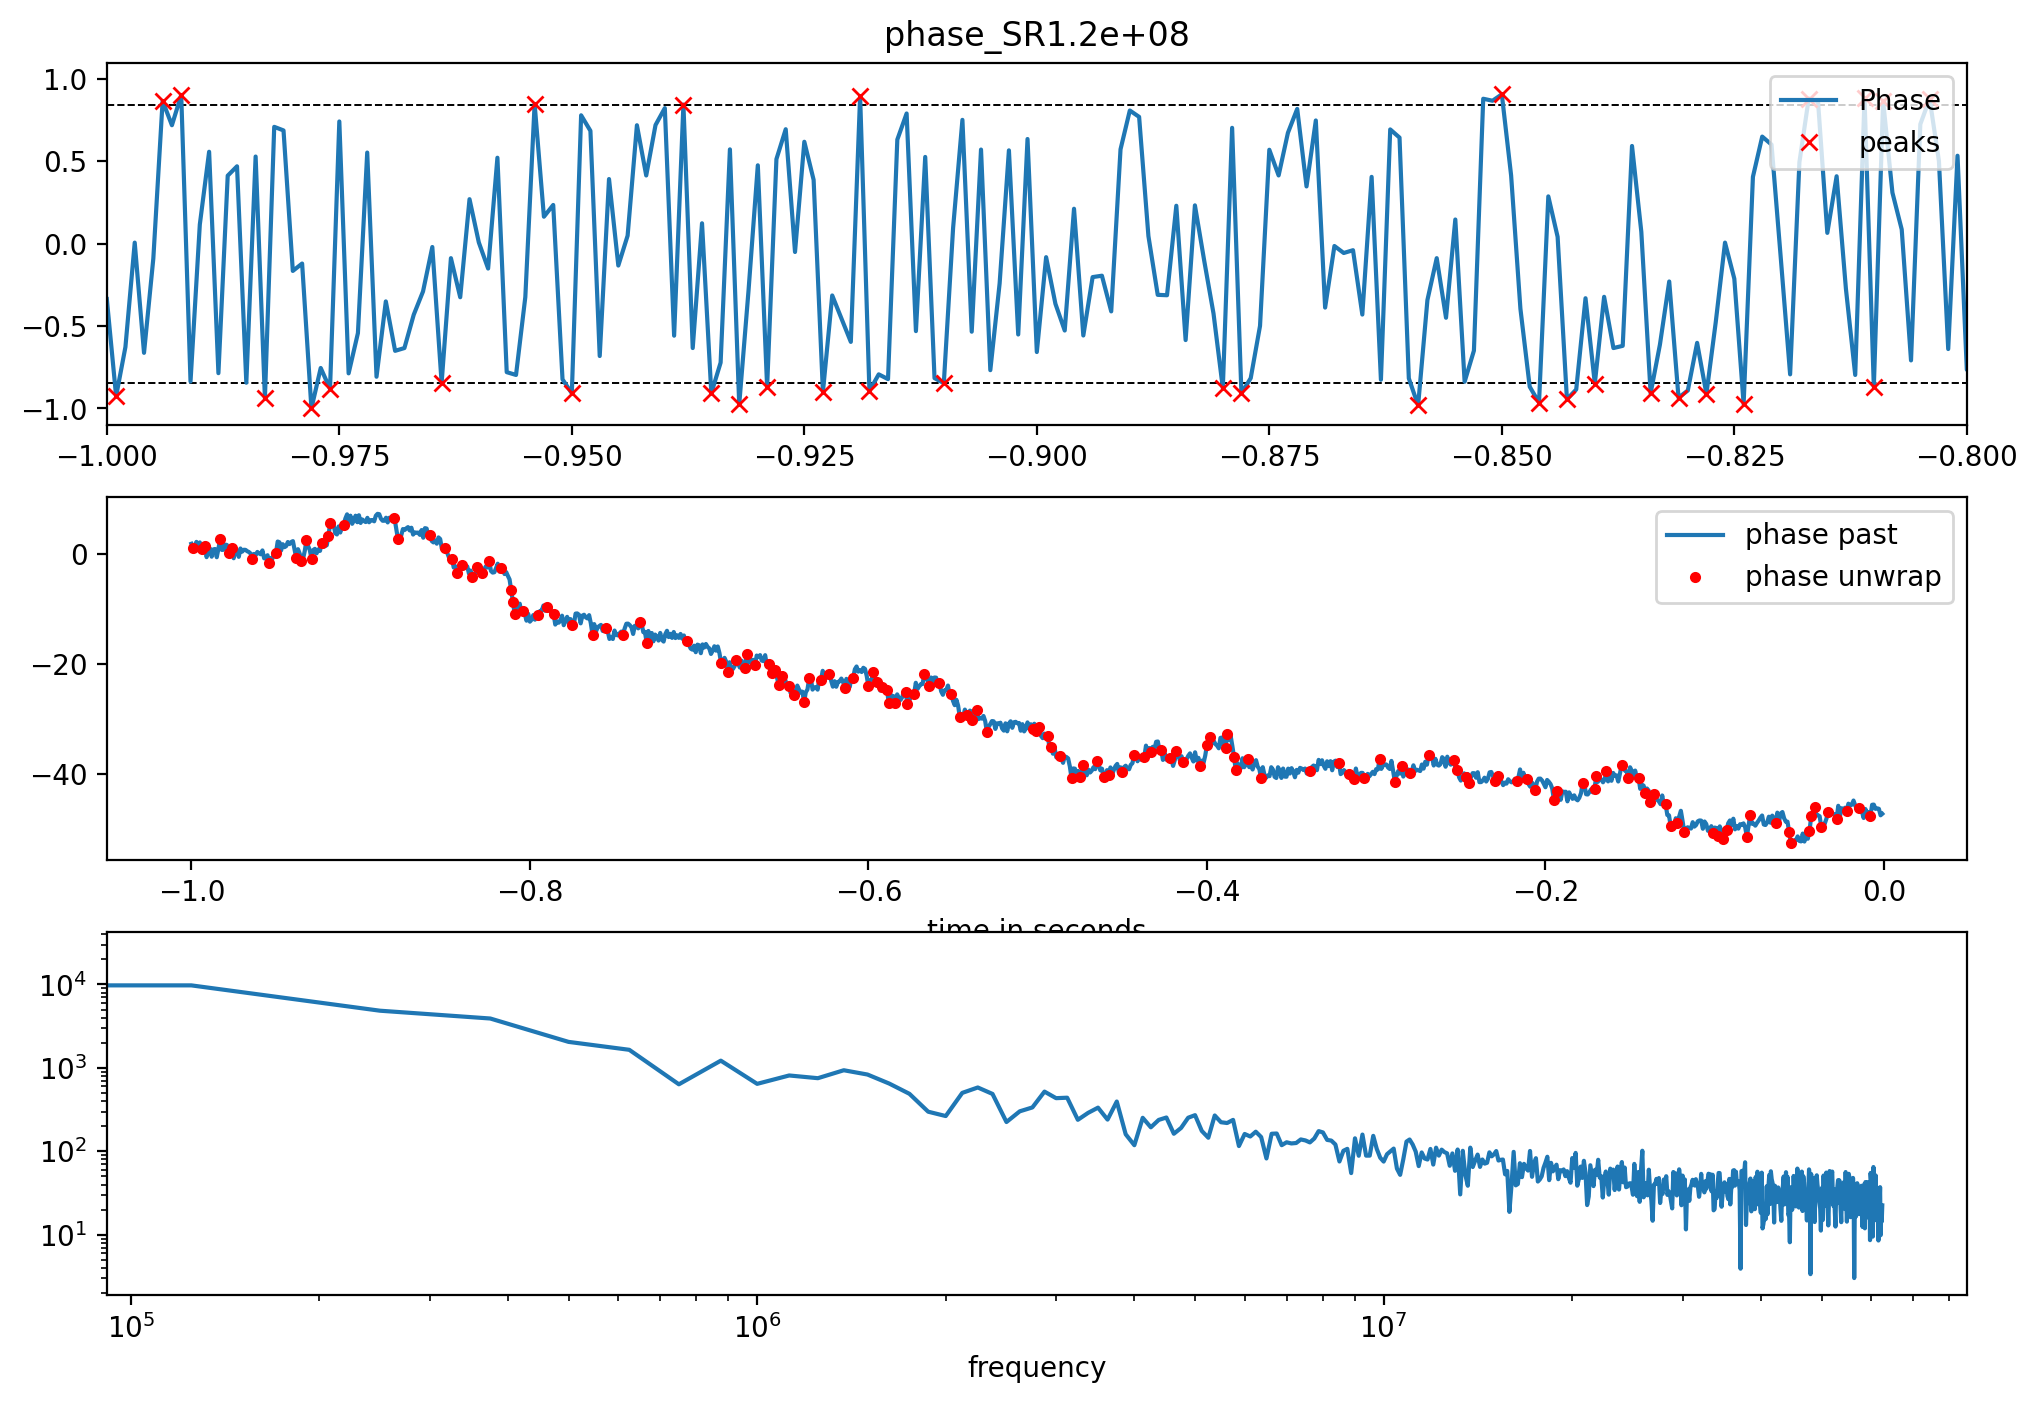

In [37]:

from scipy.signal import find_peaks
PARAM_AMP_HOLD=0.82
PARAM_PEAK_DENS=0.15
data[1]=(data[1]-np.min(data[1]))/(np.max(data[1])-np.min(data[1]))*2-1

sig_past = np.arccos(data[1])

h_peaks, _ = find_peaks(sig_past, height=PARAM_AMP_HOLD*np.pi, prominence=PARAM_PEAK_DENS)
l_peaks, _ = find_peaks(np.pi-sig_past, height=PARAM_AMP_HOLD*np.pi, prominence=PARAM_PEAK_DENS)
peaks=np.r_[l_peaks,h_peaks]
phase_limit=np.ones_like(data[0])
phase_limit[peaks]=-1
phase_limit=np.cumprod(phase_limit)
sig_past_d1=np.r_[sig_past[0],np.diff(sig_past)]
phase_past=np.cumsum((sig_past_d1)*phase_limit)

SR=125e6
file_name="phase_SR{:.1e}".format(SR)
freq=np.fft.rfftfreq(data.shape[-1],1/SR)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(12, 8), dpi=200)
ax1.axhline(y=np.cos(PARAM_AMP_HOLD*np.pi), c="k", ls="--", lw=0.7)
ax1.axhline(y=-np.cos(PARAM_AMP_HOLD*np.pi), c="k", ls="--", lw=0.7)
ax1.set_xlim(-1,-0.8)
ax1.plot(data[0], data[1], label="Phase")
ax1.plot(data[0][peaks], data[1][peaks], 'xr',label='peaks')
ax1.legend(loc=1)
ax1.set_title(file_name)
ax2.plot(data[0], phase_past, label='phase past')
ax2.plot(data[0][peaks], phase_past[peaks], '.r',label='phase unwrap')
ax2.set_xlabel("time in seconds")
ax2.legend(loc=1)

# ax1.set_xlim(-5,-2)
# ax2.set_xlim(-5,-2)

ax3.loglog(freq,(np.abs(np.fft.rfft(phase_past))))

ax3.set_xlabel("frequency")

#plt.savefig('./'+file_name+'.jpeg', dpi=200)
#np.save(file_name,data)

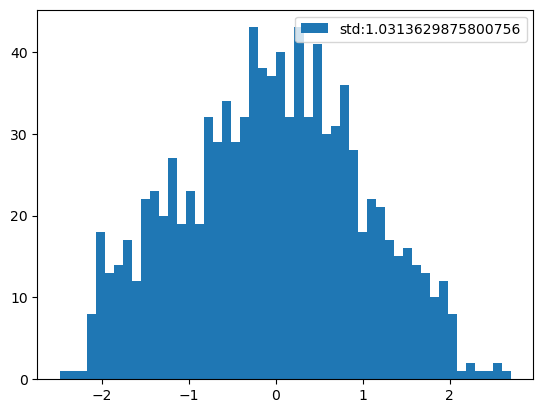

In [31]:
phase_speed=np.diff(phase_past)
plt.hist(phase_speed,bins=50,label='std:{}'.format(np.std(phase_speed)))
plt.legend()
plt.show()

In [35]:
data_csv['phase']=phase_past
data_csv.to_csv('./data/phase/background0_phase.csv',index=False)